In [41]:
import yt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import seaborn as sb

plt.style.use('seaborn-ticks')
plot_style = {'axes.axisbelow': True,
             'axes.edgecolor': '0',
             'axes.facecolor': 'white',
             'axes.grid': False,
             'axes.labelcolor': '.15',
             'axes.spines.bottom': True,
             'axes.spines.left': True,
             'axes.spines.right': True,
             'axes.spines.top': True,
             'figure.facecolor': 'white',
             'font.family': ['DejaVu Serif'],
             'font.serif': ['Times New Roman'],
             'grid.color': '.8',
             'grid.linestyle': '-',
             'image.cmap': 'rocket',
             'lines.solid_capstyle': 'round',
             'lines.linewidth': 2.5,
             'patch.edgecolor': 'w',
             'patch.force_edgecolor': True,
             'text.color': '.15',
             'xtick.bottom': True,
             'xtick.color': '.15',
             'xtick.direction': 'in',
             'xtick.top': True,
             'ytick.color': '.15',
             'ytick.direction': 'in',
             'ytick.left': True,
             'ytick.right': True}

linewidth = 2
axes_fontsize = 12
figsize = (5, 7.2)
dpi = 120

sb.set_style(plot_style)
palette = sb.color_palette('plasma', 4)

In [2]:
bbox_lim = 1e4
bbox_vec = [-bbox_lim, bbox_lim]
bbox = [bbox_vec, bbox_vec, bbox_vec]

def black_hole_data(snapshot):
    ds = yt.load('SPT2349_1e6_real01/snapshot_%s.hdf5' % str(snapshot).zfill(3), bounding_box = bbox)
    ad = ds.all_data()
    
    bh_masses = ad[('PartType5', 'Masses')].in_units('Msun')
    bh_coords = ad[('PartType5', 'Coordinates')].in_units('kpc')
    #print(ad[('PartType5', 'Velocities')].in_units('km/s'))
    return bh_masses, bh_coords

In [3]:
before_masses, before_coords = black_hole_data(99)
after_masses, after_coords = black_hole_data(100)

yt : [INFO     ] 2019-10-21 14:37:38,367 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:37:38,483 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:37:39,136 Parameters: current_time              = 0.9899999978979704
yt : [INFO     ] 2019-10-21 14:37:39,138 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:37:39,157 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:37:39,159 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:37:39,160 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:37:40,311 Allocating for 6.559e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:37:43,423 Identified 3.978e+05 octs
yt : [INFO     ] 2019-10-21 14:37:49,165 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:37:49,194 Assuming length units are in k

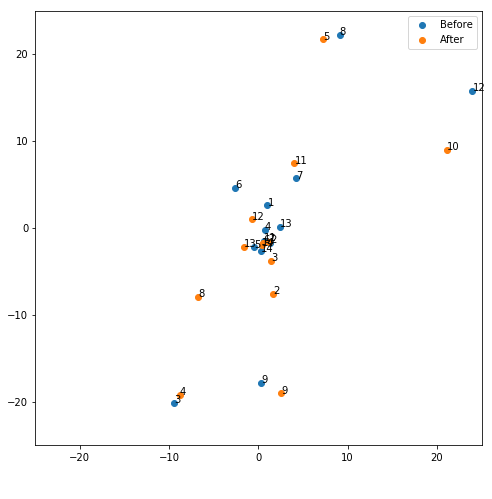

In [4]:
plt.figure(figsize = (8, 8))
ax = plt.gca()
plt.xlim([-25, 25])
plt.ylim([-25, 25])
plt.scatter(before_coords[:, 0], before_coords[:, 1], label = 'Before')
plt.scatter(after_coords[:, 0], after_coords[:, 1], label = 'After')
for i, n in enumerate(range(1, 15)):
    ax.annotate(n, (before_coords[i, 0], before_coords[i, 1]))
    ax.annotate(n, (after_coords[i, 0], after_coords[i, 1]))
plt.legend()
plt.show()

In [5]:
ds = yt.load('SPT2349_1e6_real01/snapshot_100.hdf5', bounding_box = bbox)
ad = ds.all_data()

yt : [INFO     ] 2019-10-21 14:37:59,110 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:37:59,533 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:37:59,697 Parameters: current_time              = 0.9999999989893426
yt : [INFO     ] 2019-10-21 14:37:59,698 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:37:59,731 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:37:59,732 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:37:59,733 Parameters: cosmological_simulation   = 0


In [6]:
star_coords = ad[('PartType4', 'Coordinates')].in_units('kpc')
star_masses = ad[('PartType4', 'Masses')].in_units('Msun')
bh_coords = ad[('PartType5', 'Coordinates')].in_units('kpc')

yt : [INFO     ] 2019-10-21 14:37:59,823 Allocating for 6.559e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:38:01,887 Identified 3.976e+05 octs


In [7]:
com_x = np.sum(star_masses * star_coords[:, 0]) / np.sum(star_masses)
com_y = np.sum(star_masses * star_coords[:, 1]) / np.sum(star_masses)
com_z = np.sum(star_masses * star_coords[:, 2]) / np.sum(star_masses)

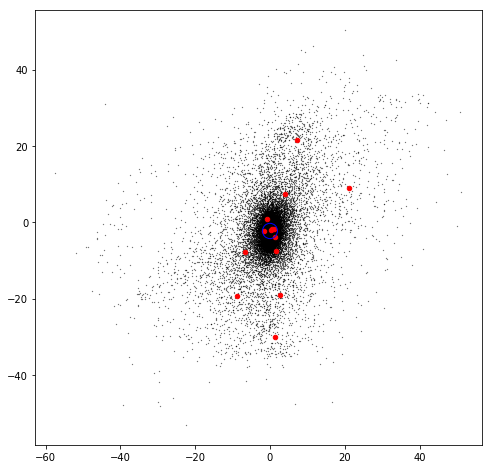

In [8]:
plt.figure(figsize = (8, 8))
circle = plt.Circle((com_x, com_y), 2, color = 'b', fill = False)
plt.scatter(star_coords[::10, 0], star_coords[::10, 1], s = 0.05, c = 'k')
plt.scatter(bh_coords[:, 0], bh_coords[:, 1], s = 20, c = 'r')
ax = plt.gca()
ax.add_artist(circle)
plt.show()
plt.close()

In [10]:
n_bhs_2kpc = np.zeros(102, dtype = int)
n_bhs_1kpc = np.copy(n_bhs_2kpc)

mass_bhs_2kpc = np.zeros(102, dtype = float)
mass_bhs_1kpc = np.copy(mass_bhs_2kpc)

for i in range(1, 103):
    snap = str(i).zfill(3)
    data_file = 'SPT2349_1e6_real01/snapshot_%s.hdf5' % snap
    
    ds = yt.load(data_file, bounding_box = bbox)
    ad = ds.all_data()
    
    star_coords = ad[('PartType4', 'Coordinates')].in_units('kpc')
    star_masses = ad[('PartType4', 'Masses')].in_units('Msun')
    bh_coords = ad[('PartType5', 'Coordinates')].in_units('kpc')
    bh_masses = ad[('PartType5', 'Masses')].in_units('Msun')
    
    com_x = np.sum(star_masses * star_coords[:, 0]) / np.sum(star_masses)
    com_y = np.sum(star_masses * star_coords[:, 1]) / np.sum(star_masses)
    com_z = np.sum(star_masses * star_coords[:, 2]) / np.sum(star_masses)
    
    star_coords[:, 0] -= com_x
    star_coords[:, 1] -= com_y
    star_coords[:, 2] -= com_z
    
    bh_coords[:, 0] -= com_x
    bh_coords[:, 1] -= com_y
    bh_coords[:, 2] -= com_z
    
    star_distances = np.linalg.norm(star_coords, axis = 1)
    bh_distances = np.linalg.norm(bh_coords, axis = 1)
    
    bh_in_2kpc_idx = np.where(bh_distances < 2)
    bh_in_1kpc_idx = np.where(bh_distances < 1)
    
    n_bhs_2kpc[i] = len(bh_in_2kpc_idx[0])
    n_bhs_1kpc[i] = len(bh_in_1kpc_idx[0])
    
    mass_bhs_2kpc[i] = np.sum(bh_masses[bh_in_2kpc_idx])
    mass_bhs_1kpc[i] = np.sum(bh_masses[bh_in_1kpc_idx])

yt : [INFO     ] 2019-10-21 14:39:00,172 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:39:00,301 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:39:00,907 Parameters: current_time              = 0.009999997913837433
yt : [INFO     ] 2019-10-21 14:39:00,908 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:39:00,911 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:39:00,913 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:39:00,914 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:39:01,576 Allocating for 6.550e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:39:04,308 Identified 3.978e+05 octs
yt : [INFO     ] 2019-10-21 14:39:12,276 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:39:12,851 Assuming length units are in

yt : [INFO     ] 2019-10-21 14:40:12,031 Identified 3.906e+05 octs
yt : [INFO     ] 2019-10-21 14:40:17,449 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:40:18,580 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:40:18,832 Parameters: current_time              = 0.10999999940395355
yt : [INFO     ] 2019-10-21 14:40:18,833 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:40:18,837 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:40:18,839 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:40:18,840 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:40:19,440 Allocating for 6.550e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:40:21,642 Identified 4.103e+05 octs
yt : [INFO     ] 2019-10-21 14:40:27,730 Omega Lambda is 0.0, so we are turning off Cosmology.
yt 

yt : [INFO     ] 2019-10-21 14:41:30,165 Allocating for 6.550e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:41:32,243 Identified 4.174e+05 octs
yt : [INFO     ] 2019-10-21 14:41:39,019 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:41:39,778 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:41:40,112 Parameters: current_time              = 0.20999999716877937
yt : [INFO     ] 2019-10-21 14:41:40,113 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:41:40,117 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:41:40,121 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:41:40,122 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:41:40,247 Allocating for 6.551e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:41:42,296 Identified 4.085e+05

yt : [INFO     ] 2019-10-21 14:42:41,372 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:42:41,378 Allocating for 6.551e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:42:43,757 Identified 3.866e+05 octs
yt : [INFO     ] 2019-10-21 14:42:47,908 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:42:48,060 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:42:48,109 Parameters: current_time              = 0.3099999986588955
yt : [INFO     ] 2019-10-21 14:42:48,110 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:42:48,112 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:42:48,114 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:42:48,115 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:42:48,123 Allocating for 6.551e+06 particles (index 

yt : [INFO     ] 2019-10-21 14:43:51,000 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:43:51,001 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:43:51,006 Allocating for 6.552e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:43:53,010 Identified 4.168e+05 octs
yt : [INFO     ] 2019-10-21 14:43:57,845 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:43:58,332 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:43:58,434 Parameters: current_time              = 0.4099999964237213
yt : [INFO     ] 2019-10-21 14:43:58,435 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:43:58,440 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:43:58,442 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:43:58,443 Parameters: cosmologi

yt : [INFO     ] 2019-10-21 14:45:06,881 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:45:06,882 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:45:06,883 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:45:06,888 Allocating for 6.553e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:45:08,979 Identified 3.862e+05 octs
yt : [INFO     ] 2019-10-21 14:45:13,475 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:45:13,856 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:45:13,927 Parameters: current_time              = 0.5099999979138374
yt : [INFO     ] 2019-10-21 14:45:13,928 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:45:13,932 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:45:13,935 Parameters: domain

yt : [INFO     ] 2019-10-21 14:46:23,049 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:46:23,055 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:46:23,057 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:46:23,058 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:46:23,064 Allocating for 6.556e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:46:25,136 Identified 3.747e+05 octs
yt : [INFO     ] 2019-10-21 14:46:29,053 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:46:29,070 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:46:29,186 Parameters: current_time              = 0.6099999994039536
yt : [INFO     ] 2019-10-21 14:46:29,187 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:46:29,196 Parameters: domain_left_edge        

yt : [INFO     ] 2019-10-21 14:47:30,028 Parameters: current_time              = 0.6999999989376025
yt : [INFO     ] 2019-10-21 14:47:30,029 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:47:30,034 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:47:30,036 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:47:30,037 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:47:30,042 Allocating for 6.558e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:47:32,255 Identified 3.896e+05 octs
yt : [INFO     ] 2019-10-21 14:47:41,541 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:47:41,994 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:47:42,233 Parameters: current_time              = 0.7099999975144036
yt : [INFO     ] 2019-10-21 14:47:42,234 Parameters: domain_dimens

yt : [INFO     ] 2019-10-21 14:48:55,956 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:48:56,470 Parameters: current_time              = 0.7999999997930394
yt : [INFO     ] 2019-10-21 14:48:56,471 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:48:56,476 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:48:56,482 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:48:56,483 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:48:56,597 Allocating for 6.558e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:48:58,905 Identified 4.054e+05 octs
yt : [INFO     ] 2019-10-21 14:49:03,755 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:49:03,798 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:49:03,839 Parameters: current_time              = 

yt : [INFO     ] 2019-10-21 14:50:06,682 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:50:06,709 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:50:06,827 Parameters: current_time              = 0.8999999981339055
yt : [INFO     ] 2019-10-21 14:50:06,828 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:50:06,831 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:50:06,832 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:50:06,833 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:50:06,840 Allocating for 6.558e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:50:08,992 Identified 4.014e+05 octs
yt : [INFO     ] 2019-10-21 14:50:13,095 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:50:13,128 Assuming length units are in k

yt : [INFO     ] 2019-10-21 14:51:15,040 Identified 3.978e+05 octs
yt : [INFO     ] 2019-10-21 14:51:19,387 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2019-10-21 14:51:19,429 Assuming length units are in kpc (physical)
yt : [INFO     ] 2019-10-21 14:51:19,501 Parameters: current_time              = 0.9999999989893426
yt : [INFO     ] 2019-10-21 14:51:19,502 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-10-21 14:51:19,504 Parameters: domain_left_edge          = [-10000. -10000. -10000.]
yt : [INFO     ] 2019-10-21 14:51:19,506 Parameters: domain_right_edge         = [10000. 10000. 10000.]
yt : [INFO     ] 2019-10-21 14:51:19,507 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2019-10-21 14:51:19,531 Allocating for 6.559e+06 particles (index particle type 'all')
yt : [INFO     ] 2019-10-21 14:51:21,396 Identified 3.976e+05 octs
yt : [INFO     ] 2019-10-21 14:51:24,726 Omega Lambda is 0.0, so we are turning off Cosmology.
yt :

IndexError: index 102 is out of bounds for axis 0 with size 102

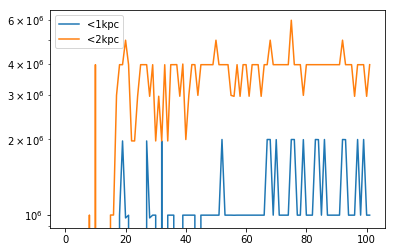

In [28]:
times = np.arange(len(mass_bhs_1kpc)) * 978 * 0.01 / 1e3 

plt.figure()
plt.yscale('log')
plt.plot(np.arange(len(mass_bhs_1kpc)), mass_bhs_1kpc, label = '<1kpc')
plt.plot(np.arange(len(mass_bhs_2kpc)), mass_bhs_2kpc, label = '<2kpc')
plt.legend(loc = 'upper left')
plt.show()
plt.close()

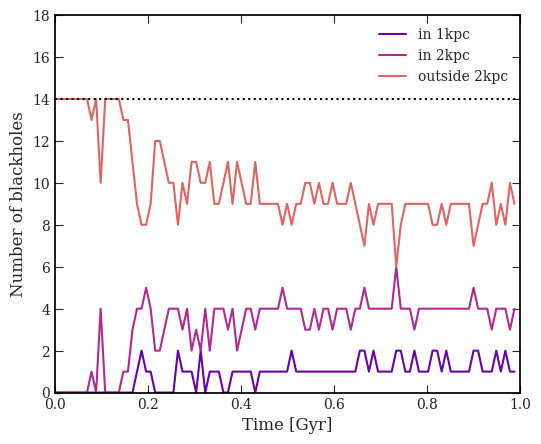

In [53]:
plt.figure(figsize = (6, 5), dpi = 100, facecolor = 'w')
plt.xlim([0, 1])
plt.ylim([0, 18])
plt.ylabel('Number of blackholes', fontsize = axes_fontsize)
plt.xlabel('Time [Gyr]', fontsize = axes_fontsize)
plt.plot(times, n_bhs_1kpc, label = 'in 1kpc', c = palette[0])
plt.plot(times, n_bhs_2kpc, label = 'in 2kpc', c = palette[1])
plt.plot(times, 14 - (n_bhs_1kpc + n_bhs_2kpc), label = 'outside 2kpc', c = palette[2])
plt.axhline(14, ls = ':', c = 'k')
plt.legend(loc = 'upper right')
plt.show()
plt.close()

No handles with labels found to put in legend.


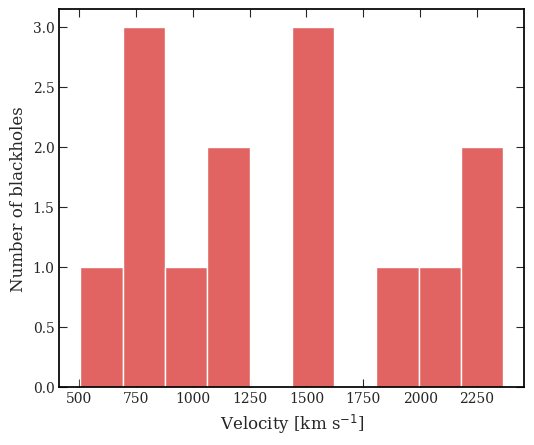

In [59]:
velocities = ad[('PartType5', 'Velocities')].in_units('km/s')
vel_mags = np.linalg.norm(velocities, axis = 1)

plt.figure(figsize = (6, 5), dpi = 100, facecolor = 'w')
plt.ylabel('Number of blackholes', fontsize = axes_fontsize)
plt.xlabel('Velocity [km s$^{-1}$]', fontsize = axes_fontsize)
plt.hist(vel_mags, color = palette[2])
plt.legend(loc = 'upper right')
plt.show()
plt.close()